# Завдання на використання SQL в Python

1.Встановіть бібліотеку `mysql-connector-python` через pip aбо через conda.

In [1]:
!conda install -c anaconda mysql-connector-python

Channels:
 - anaconda
 - defaults
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.



2.В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робилось в лекції:

In [178]:
import mysql.connector
from mysql.connector.connection import MySQLConnection
import datetime

In [180]:
con = mysql.connector.connect(user = 'user1', password = '7oygWy6P',
                              host = '3.68.62.36', database = 'employees')

3.Виберіть максимальну і мінімальну дати найму співробітників використовуючи `con.cursor()`. Аби отримати результати в кінці, виконайте `cursor.fetchall()`.

In [183]:
cursor = con.cursor()

In [185]:
sql = """
SELECT max(hire_date), min(hire_date)
FROM employees
"""

In [187]:
cursor.execute(sql)

In [189]:
cursor.fetchall()

[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]

Очікуваний результат:  
    `[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]`

4.Давайте зберемо інформацію про останню ЗП кожного співробіткника в базі. З використанням `con.cursor()` виберіть з таблиці `salaries` для кожного співробітника його номер, останню в базі даних (тобто ту, що відповідає найновішій `to_date`) ЗП, та значення `from_date`, `to_date` для цієї ЗП.

Результати запишіть у pandas DataFrame, який збережіть у змінну `res`. Як взяти з курсора назви колонок - вже наведено. На екран виведіть назви колонок в змінній `res`, розмір цього датафрейму та перші 3 записи в ньому.

УВАГА! Зверніть увагу, що ЗП може оновлюватись протягом одного дня, тобто є випадки, коли апдейт ЗП був в певний день, скажімо 2001-01-01 і потім стався ще один апдейт ЗП цьому співробітнику цього самого дня. Запит має це враховувати.
Також, теоретично ЗП може бути зменшена. Тож, брати дату з максимальною ЗП буде неправильно з точки зору бізнес логіки. Треба саме останнє історичне значення ЗП кожного співробітника.

In [193]:
import pandas as pd

In [195]:
cursor = con.cursor()

sql = """
SELECT s1.emp_no, s1.salary, s1.from_date, s1.to_date
FROM salaries s1
WHERE s1.to_date = (
SELECT MAX(s2.to_date)
FROM salaries s2
WHERE s1.emp_no=s2.emp_no)
ORDER BY s1.emp_no
"""
cursor.execute(sql)

In [197]:
sql

'\nSELECT s1.emp_no, s1.salary, s1.from_date, s1.to_date\nFROM salaries s1\nWHERE s1.to_date = (\nSELECT MAX(s2.to_date)\nFROM salaries s2\nWHERE s1.emp_no=s2.emp_no)\nORDER BY s1.emp_no\n'

In [199]:
field_names = [i[0] for i in cursor.description]

In [201]:
res = pd.DataFrame(cursor.fetchall(), columns = field_names)

In [202]:
display(res.head(3), res.columns, res.shape)

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01


Index(['emp_no', 'salary', 'from_date', 'to_date'], dtype='object')

(300180, 4)

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1lNvzbAebtkj3C2v-I5AE6HkMH8MTI1kA)

5.В утвореній вибірці в змінній `res` скільки значень `to_date` рівні `9999-01-01`, а скільки - ні? Увага! Для виконання цього завдання важливо розуміти, який тип даних у значень колонки `to_date`. Зʼясуйте це, і потім напишіть фільтр для виводу потрібного результату.

In [174]:
print(res['to_date'].dtype)

datetime64[ns]


In [294]:
from datetime import date

target_date = date(9999, 1, 1)

count_9999 = res[res['to_date'] == target_date].shape[0]
count_other = res[res['to_date'] != target_date].shape[0]

print("Кількість значень to_date == 9999-01-01:", count_9999)
print("Кількість значень to_date != 9999-01-01:", count_other)

Кількість значень to_date == 9999-01-01: 240124
Кількість значень to_date != 9999-01-01: 60056


6.Виведіть візуально розподіл (гістограму) зарплат співробітників, які досі працюють в компанії, використовуючи результат попереднього завдання. Співробітниками, які досі працюють в компанії вважаємо тих, в кого to_date має значення 9999-01-01. Обовʼязково підпишіть графік і вісі.

Ці три завдання - приклад, як нам може бути зручно витягнути дані з бази певним запитом, а потім використати витягнуту вибірку у Python для подальшого аналізу.

In [311]:
import matplotlib.pyplot as plt

In [317]:
current_employees = res[res['to_date'] == date(9999, 1, 1)]

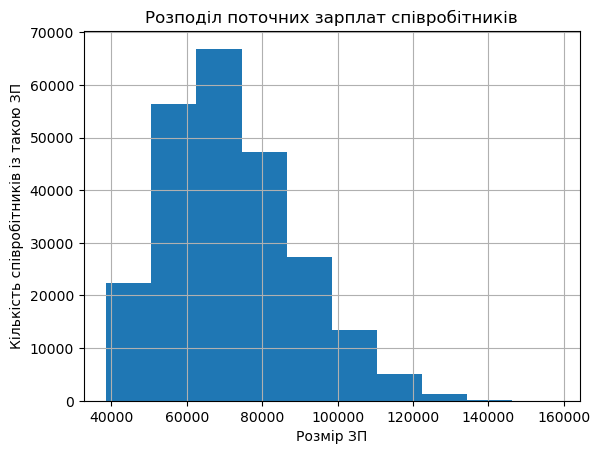

In [319]:
current_employees['salary'].hist()
plt.title('Розподіл поточних зарплат співробітників')
plt.xlabel('Розмір ЗП')
plt.ylabel('Кількість співробітників із такою ЗП')
plt.show();

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1j8MHLC1E0revbQLM9B0UJs6tVEgoWhmK)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [321]:
con.close()